# Model Training

## 1. Import all the required libraries

In [30]:
# Essential Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Model Traing Libraries
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
import warnings


## 2. Import the Dataset

In [31]:
df = pd.read_csv('data/stud.csv')

#### Checking the head of the data

In [32]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## 3. Preparing the independant features and dependant feature

### 3.1 Splitting the X and Y

In [35]:
X = df.drop('math_score',axis=1)

In [36]:
y = df['math_score']

### 3.2 Creating a Preprocessing pipeline

In [37]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer

num_variables = X.select_dtypes(exclude='object').columns
cat_variables = X.select_dtypes(include='object').columns

numeric_transformer = StandardScaler()
onehot_transformer = OneHotEncoder()

preprocess_pipeline = ColumnTransformer([
    ('StandardScaler', numeric_transformer, num_variables),
    ('OneHotEncoder', onehot_transformer, cat_variables)
])

### 3.3 Fitting the Independant features to the pipeline 

In [38]:
X = preprocess_pipeline.fit_transform(X)

In [39]:
X.shape

(986, 19)

### 3.4 Splitting the train and test data

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 4. Create a function to evaluate all the metrics after the model training

### 4.1 Creating the function

In [41]:
def evaluate_model(true, predict):
    mae = mean_absolute_error(true,predict)
    rmse = np.sqrt(mean_squared_error(true,predict))
    r2 = r2_score(true,predict)
    return mae, rmse, r2

### 4.2 Evaluating for different models

In [42]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Ada Boost Regressor": AdaBoostRegressor(),
    "Support Vector Machine": SVR(),
    "XGB Regressor": XGBRegressor(),
    "Catboost Regressor": CatBoostRegressor(logging_level='Silent'),
    "K Neighbours regressor": KNeighborsRegressor()
}

models_list=[]
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test,y_test_pred)

    print(list(models.keys())[i])
    models_list.append(list(models.keys())[i])

    print("Model perfomance for Training Set")
    print("- Root Mean squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print("-"*20)

    print("Model perfomance for Test Set")
    print("- Root Mean squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print("="*35)
    print("\n")


Linear Regression
Model perfomance for Training Set
- Root Mean squared Error: 5.2681
- Mean Absolute Error: 4.2215
- R2 Score: 0.8629
--------------------
Model perfomance for Test Set
- Root Mean squared Error: 5.5748
- Mean Absolute Error: 4.3395
- R2 Score: 0.8569


Lasso
Model perfomance for Training Set
- Root Mean squared Error: 6.5974
- Mean Absolute Error: 5.2635
- R2 Score: 0.7849
--------------------
Model perfomance for Test Set
- Root Mean squared Error: 6.7329
- Mean Absolute Error: 5.2437
- R2 Score: 0.7912


Ridge
Model perfomance for Training Set
- Root Mean squared Error: 5.2683
- Mean Absolute Error: 4.2202
- R2 Score: 0.8628
--------------------
Model perfomance for Test Set
- Root Mean squared Error: 5.5700
- Mean Absolute Error: 4.3368
- R2 Score: 0.8571


Decision Tree
Model perfomance for Training Set
- Root Mean squared Error: 0.3778
- Mean Absolute Error: 0.0266
- R2 Score: 0.9993
--------------------
Model perfomance for Test Set
- Root Mean squared Error: 7.

In [43]:
pd.DataFrame(list(zip(models_list, r2_list)),columns=['Model Name','R2 Score']).sort_values(by=['R2 Score'],ascending=False)

,Model Name,R2 Score
2,Ridge,0.857134
0,Linear Regression,0.856887
8,Catboost Regressor,0.832918
4,Random Forest,0.832083
5,Ada Boost Regressor,0.817420
6,Support Vector Machine,0.797633
7,XGB Regressor,0.794914
1,Lasso,0.791250
9,K Neighbours regressor,0.778572
3,Decision Tree,0.706380


- We will be using Ridge algorithm as it has the highest R2 Score.

## 5. training the model with the data

In [44]:
ridge_model = Ridge(fit_intercept=True)
ridge_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)
score = r2_score(y_test,y_pred)*100
print(f"Accuracy of the model: {score}")

Accuracy of the model: 85.71339162897864


### Plot the y_pred and y_test

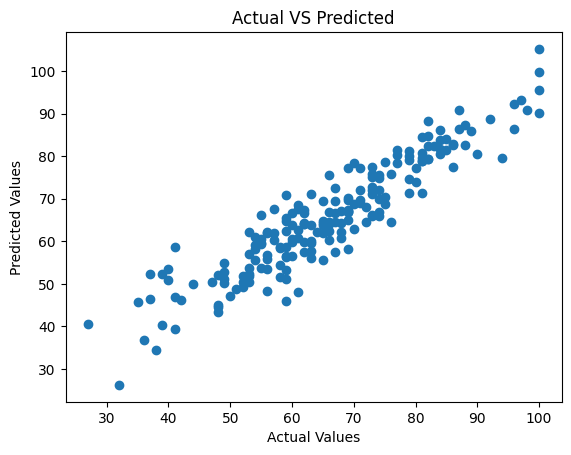

In [45]:
plt.scatter(y_test,y_pred)
plt.title("Actual VS Predicted")
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

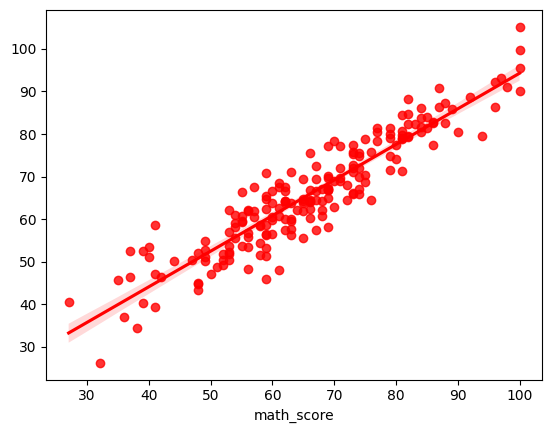

In [46]:
sns.regplot(x=y_test,y=y_pred,color='red')
plt.show()

In [47]:
pred_df = pd.DataFrame({"Actual":y_test,"Prediicted":y_pred,"Difference":y_test-y_pred})
pred_df.head(20)

,Actual,Prediicted,Difference
623,100,90.197491,9.802509
458,100,95.601744,4.398256
741,37,46.426157,-9.426157
443,73,70.997135,2.002865
280,53,52.264504,0.735496
590,58,58.687880,-0.687880
717,96,86.262041,9.737959
304,74,69.824926,4.175074
728,73,75.196303,-2.196303
502,63,59.668223,3.331777
